<h1><center>Country Data Clustering and PCA Analysis</center></h1>

<h3><center>Group 4</center></h3>

In [22]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error

from warnings import simplefilter
simplefilter(action="ignore")
#Importing all necceasry packages

In [3]:
df = pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Our data looks at many different aspects of countries including their income, health, life expectancy, etc and from this data set we can potentially learn about the relationship between economic indicators like Imports,Exports,GDP and social indicators like Child Mortality and Life Expectancy and how mulitple different countries are doing in regards to this relationship. We can show an example of this in the graph below indicating the relationship between GDP and Life expectancy.

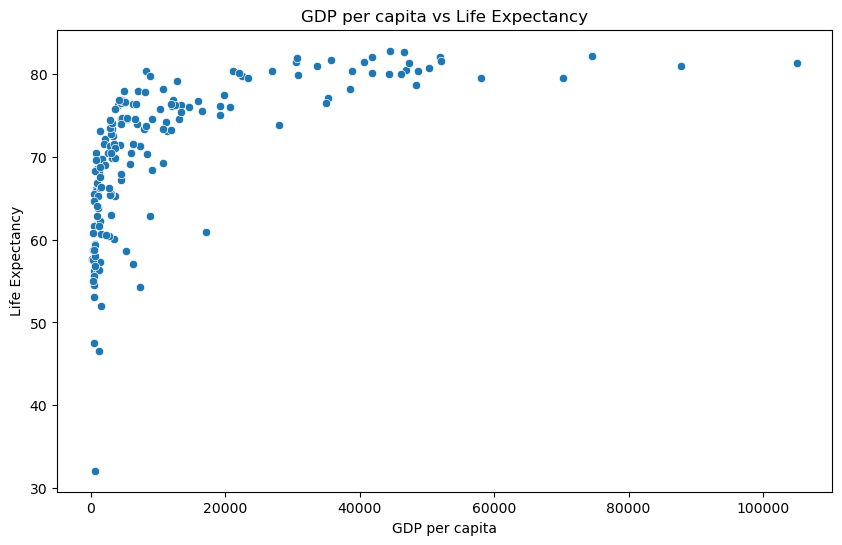

In [7]:
df = pd.read_csv("Country-data.csv")
df

# Create a scatter plot of GDP vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpp', y='life_expec', data=df)
plt.title('GDP per capita vs Life Expectancy')
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.show()
#As GDP increases Life expectancy increases

## Data Cleaning

In [10]:
df.info() #Checking If we have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Since all features have 167 counts we know that there is no missing data so we can proceed

In [12]:
df = df.drop(columns=['country']) #Dropping Country variable since its an object and will cause errors in later parts
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Each country will now be an instance in the data

We will first remove any large outliers in the data using z-scores, to prevent clusters from being skewed/influenced by single outliers

In [14]:
#Remove outliers using Z-Score
X=df # Convert to array
z_scores = np.abs(stats.zscore(X))  # Calculate Z-scores
X_filtered = X[(z_scores < 3).all(axis=1)]  # Keep only rows with Z-scores < 3 (Less thann 3 standard deviations)
df_filtered = X[(z_scores < 3).all(axis=1)]  # Filtering original dataframe too

Now we need to transform data and normalize it

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered) # Standardizes features into array
scaled_df = pd.DataFrame(data=X_scaled, columns =df.columns) # Converting scaled arrqy back into DataFrame
scaled_df
# Each country is an instance

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874
...,...,...,...,...,...,...,...,...,...
148,-0.025502,-0.343612,-0.381062,-0.903307,-0.757746,1.368064,-0.202080,-0.418486,-0.662557
149,-0.221423,0.390877,-0.602264,0.364991,-0.854287,-0.635844,-0.909199,0.369138,-0.548167
150,-0.384230,1.642960,0.025791,1.806239,-0.739037,0.732820,0.322164,-0.683290,-0.667593
151,0.526386,-0.427413,-0.629915,-0.594094,-0.739785,2.393118,-0.360572,1.163551,-0.667593


# Kmeans Clustering

### Figuring out optimal number of clusters

In [24]:
k_range = range(2, 10) #start testing for at least 2 clusters

#create empty lists for storing the resulting values
inertias = []
silhouette_scores = []

#Run a for loop so that we cluster using k-means for many different k
for k in k_range:
    # Fit KMeans for each value of k
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    
    # Append the inertia (sum of squared distances)
    inertias.append(kmeans.inertia_)
    
    # Predict cluster labels
    labels = kmeans.labels_
    
    # Calculate the silhouette score and append
    score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(score)

Text(0.5, 1.0, 'Elbow Plot')

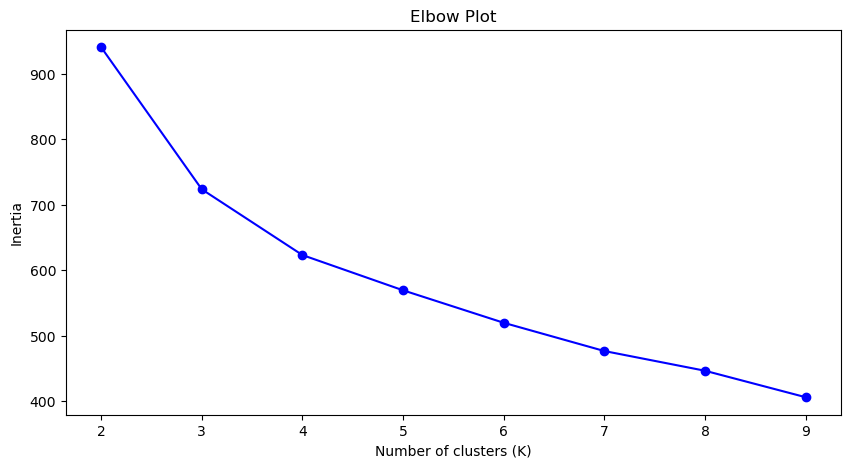

In [26]:
#elbow plot
plt.subplots(figsize = (10,5))

plt.plot(k_range, inertias, 'bo-', label='Inertia')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')

Text(0.5, 1.0, 'Silhouette Plot')

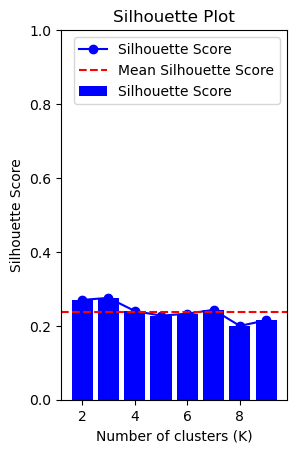

In [28]:
#silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'bo-', label='Silhouette Score')
plt.bar(k_range, silhouette_scores, color='blue', label='Silhouette Score')
plt.axhline(y=np.mean(silhouette_scores), color='red', linestyle='--', label='Mean Silhouette Score')
plt.legend(loc='best')  # Ensure the legend is placed automatically in the best position
plt.ylim([0,1])

plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')

From both the silhouette plot and the elbow plot I decided that 3 clusters is the ideal amount

## Checking the Centroid Vaues and within Cluster Variances

In [30]:
# Setting up Kmeans analysis
k = 3
kmeans = KMeans(n_clusters = k, n_init=100, random_state=42)
y_pred = kmeans.fit(scaled_df)

In [32]:
centroids = kmeans.cluster_centers_  # Centroid value
within_cluster_variances = []
for i in range(kmeans.n_clusters):
    cluster_data = scaled_df[kmeans.labels_ ==i] #Getting data from each cluster i
    #calculate the sample variance and within cluster var for each feature in the cluster
    variances = np.var(cluster_data, axis=0) 
    within_cluster_variances.append(variances)
    
n_obs_per_cluster = np.bincount(kmeans.labels_)
within_cluster_variances = np.array(within_cluster_variances)

In [34]:
columns = scaled_df.columns  # Feature names

# Create a profiling DataFrame with centroids and variances
profile_df = pd.DataFrame(data=centroids, columns=columns)
profile_df['Cluster'] = range(1, kmeans.n_clusters + 1)

# Add variance columns (rename them to make it clear they represent variances)
for i, column in enumerate(columns):
    profile_df[f'{column}_variance'] = within_cluster_variances[:, i]

# Display the cluster profiles
print(profile_df)

   child_mort   exports    health   imports    income  inflation  life_expec  \
0   -0.893051  0.398448  0.969709 -0.061768  1.669876  -0.776912    1.152071   
1   -0.465244  0.160204 -0.190397  0.159185 -0.132834   0.002712    0.313567   
2    1.304137 -0.503243 -0.261721 -0.227381 -0.774372   0.458340   -1.206729   

   total_fer      gdpp  Cluster  child_mort_variance  exports_variance  \
0  -0.811813  1.885177        1             0.003889          1.131060   
1  -0.454612 -0.300944        2             0.104549          0.815148   
2   1.238095 -0.623645        3             0.544374          0.838269   

   health_variance  imports_variance  income_variance  inflation_variance  \
0         0.622060          0.877840         0.316342            0.182842   
1         0.722501          1.042282         0.364133            0.929039   
2         0.996826          0.906578         0.172395            1.034908   

   life_expec_variance  total_fer_variance  gdpp_variance  
0            

With these values we can identify different important features of each cluster. 1st part before Cluster column shows the centroid values of the clusters, and the columns after show within cluster var.

Cluster 1:
An important finding in this cluster is that the countries in this cluster appear to be more developed countries in that they have low chid mortality rates (-number is better) and high health, income, and life expectancy (Higher better in these). Within this cluster I can see that child mortaility has low var meaning these countries have very similar child mortaility rates, but exports has a high var value signifying high difference in exports between countries in this group. 

Cluster 3:
Countries in this group have high child mortality(High + number), low health, low gdp and low income, from these featues we see that these countries are most likely less developed, poorer countries. Within this cluster there is low gdp var but high inflation var.

CLuster 2:
Cluster 2 is sort of the countries inbetween these 2 clusters when it comes to these features, moderately developed countries.

## Ploting Results for Visual Representation

In [36]:
centroid_means = kmeans.cluster_centers_
plt.figure(figsize=(12, 8))
n_clusters = kmeans.n_clusters
n_cols = math.ceil(math.sqrt(n_clusters))  # Number of columns (nearest square root)
n_rows = math.ceil(n_clusters / n_cols)    # Number of rows to fit all clusters

global_min = np.min(centroid_means)
global_max = np.max(centroid_means)
max_variance = np.max([np.max(variances) for variances in within_cluster_variances])
max_std = np.sqrt(max_variance)  # Maximum standard deviation

<Figure size 1200x800 with 0 Axes>

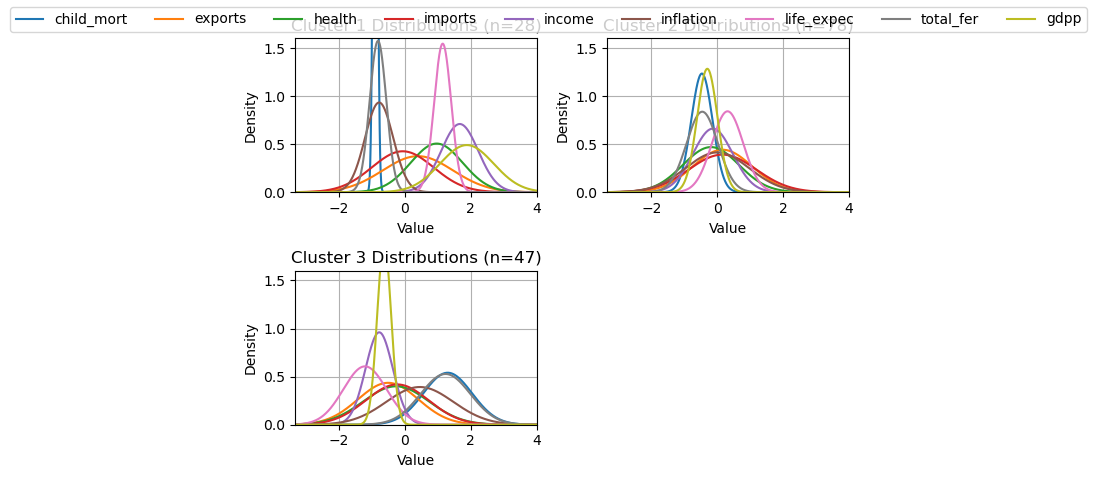

In [44]:
# Initialize a list to store line objects and labels
line_objects = []
labels = []

for i in range(n_clusters):  # Loop through each cluster
    plt.subplot(n_rows, n_cols, i + 1)  # Dynamically place the plots
    
    # Get the centroid means and variances for the ith cluster across all features
    centroids = centroid_means[i]
    variances = within_cluster_variances[i]
    
    # dfine x-values for the normal distribution curve (based on centroids)
    #x_values = np.linspace(np.min(centroids) - 10, np.max(centroids) + 10, 1000)
    x_values = np.linspace(global_min - 2 * max_std, global_max + 2 * max_std, 1000)
    
    # Plot the normal distribution for each feature in the ith cluster
    for j in range(len(centroids)):
        #plot normal distribution with mean=centroid and std=sqrt(variance)
        line, = plt.plot(x_values, norm.pdf(x_values, centroids[j], np.sqrt(variances[j])), label=scaled_df.columns[j])

        # Collect line objects and labels for the common legend
        if i == 0:  # Only collect labels from the first cluster (to avoid duplicates)
            line_objects.append(line)
            labels.append(scaled_df.columns[j])

    plt.title(f'Cluster {i+1} Distributions (n={n_obs_per_cluster[i]})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.xlim([global_min - 2 * max_std, global_max + 2 * max_std])
    plt.ylim([0,1.6])
    plt.grid(True)

plt.tight_layout()
# Create a common legend
plt.figlegend(line_objects, labels, loc='upper center', ncol=len(centroids))
plt.show()

It appears that the Countries in the 2nd cluster have the most similar features, the lowest within variance from these plots. Cluster 1 and 2 have high variance

All these clusters are quite meaningful but overall the most meaningfull one would be cluster 3 as it shows us the different charactersistics that make up poorer less developed countries and we learn different aspects that could contribute to poorness in countries.

# PCA Analysis

In [45]:
# Perform PCA
pca = PCA()
pca.fit(scaled_df)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance)

## Choosing amount of PC's

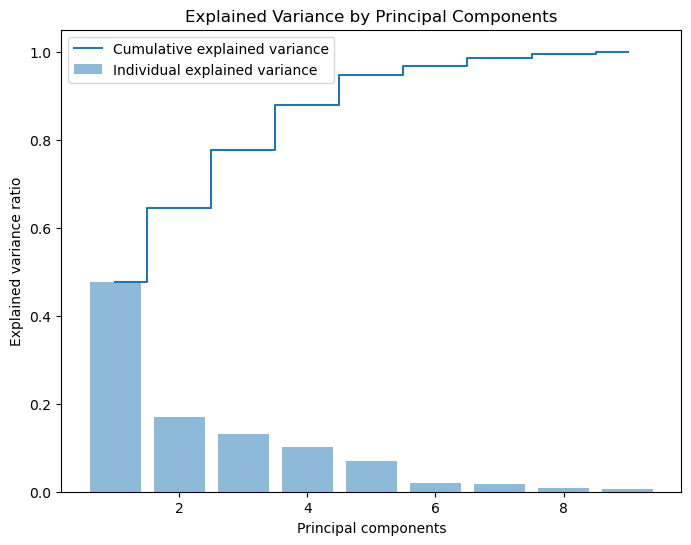

In [47]:
# Step 5: Plot the explained variance for each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance)+1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()
# Plot shoes how much vriance each PC explains individually as well as cumulatively 

In [49]:
# Print the explained variance ratios and cumulative variance
print("Explained variance ratios for each component:", explained_variance)
print("Cumulative variance explained by components:", cumulative_variance)

Explained variance ratios for each component: [0.47638387 0.16902847 0.13080614 0.10179586 0.06939066 0.02084938
 0.01747184 0.00883956 0.00543422]
Cumulative variance explained by components: [0.47638387 0.64541234 0.77621848 0.87801434 0.94740499 0.96825437
 0.98572622 0.99456578 1.        ]


From these numbers we see that PC1 explains the highest percentage of the variance in the data explaning 47.64% of the var. This means that most of the key patterns in the data are captured by PC1. Each successive principle component explains less and less of the var in the data.

Looking at the cumilative var, after the 5th principle component the additional var explanied is low so we say it does not add any more meaningful information.

We dont want use all of the components because in that case while we will capturre 100% of the variance we will not be simplyfing the data which is our goal, so we choose to use 5 components to keep 94.7% of the var and still simplifying the data

## Analyzing Results

In [51]:
n_components = 5 #Choosing 5 components
pca = PCA(n_components=n_components)
principal_comp = pca.fit_transform(scaled_df)
pc_df = pd.DataFrame(principal_comp) #Principle components df
pc_df.columns = [f'PC{i+1}' for i in range(n_components)]
# Data reconstructed with the 5 PC's
recon_df = pd.DataFrame(principal_comp.dot(pca.components_) + pca.mean_, columns= scaled_df.columns)

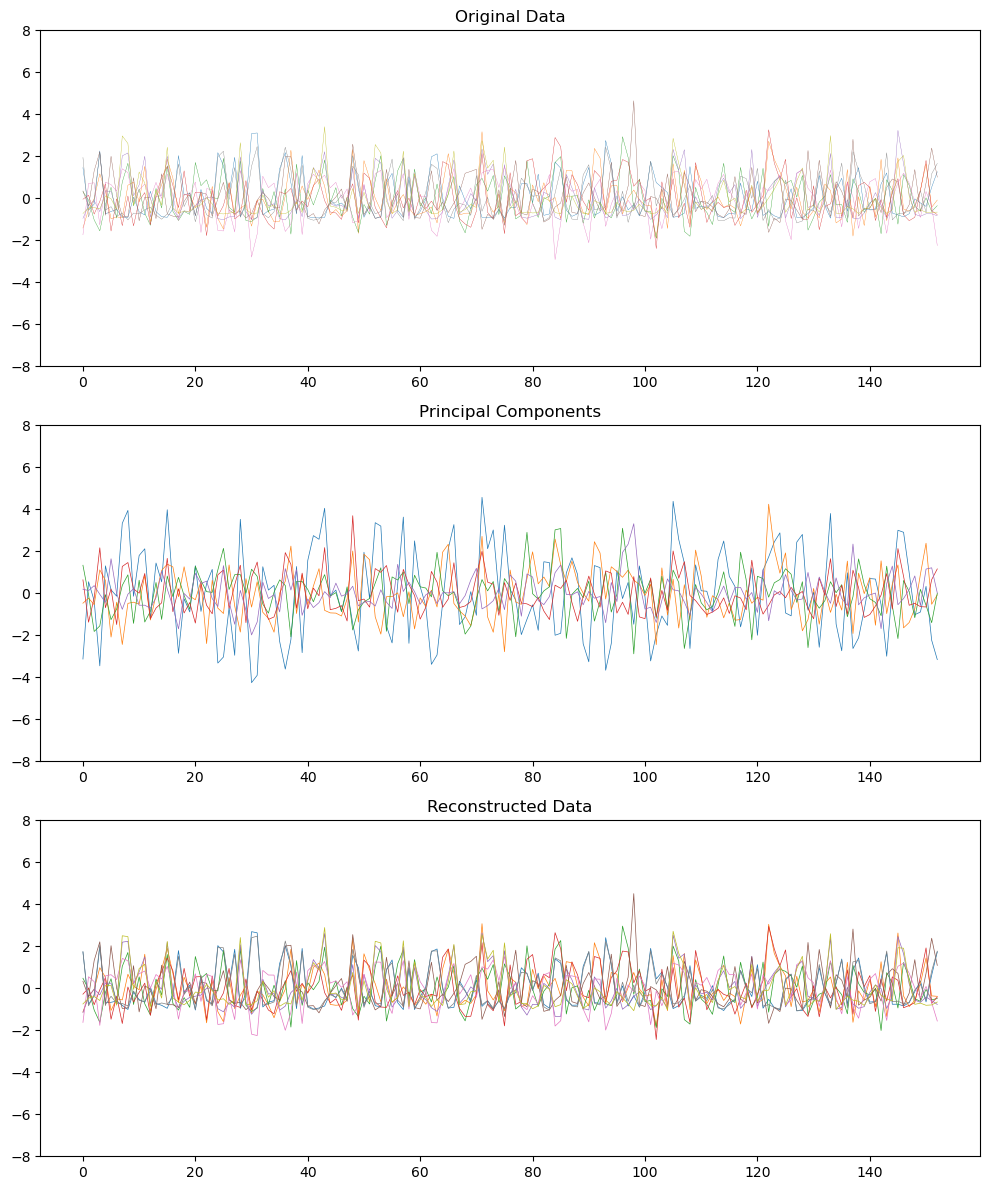

In [53]:
#Plotting the original df, PC df, and reconstructed df
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
scaled_df.plot(ax=axes[0], legend=False, linewidth=0.25, title="Original Data", ylim=[-8, 8])
pc_df.plot(ax=axes[1], legend=False, linewidth=0.5, title="Principal Components", ylim=[-8, 8])
recon_df.plot(ax=axes[2], legend=False, linewidth=0.5, title="Reconstructed Data", ylim=[-8, 8])
plt.tight_layout()
plt.show()
# Plot shows how well the 5 compoeonts explain the var in data and how well it reconstructs the data

We can see that the reconstructed data is very similar to the original data

In [55]:
scaled_df, recon_df
#Values of original data vs reconstructed data

(     child_mort   exports    health   imports    income  inflation  \
 0      1.461836 -1.413304  0.318094 -0.043800 -0.954569   0.348785   
 1     -0.569112 -0.526002 -0.088760  0.150114 -0.331921  -0.365865   
 2     -0.273852 -0.013338 -1.028868 -0.751321 -0.109654   1.310315   
 3      2.256555  1.164802 -1.550273 -0.148618 -0.633516   2.219869   
 4     -0.742957  0.336653 -0.294162  0.689927  0.354339  -0.806205   
 ..          ...       ...       ...       ...       ...        ...   
 148   -0.025502 -0.343612 -0.381062 -0.903307 -0.757746   1.368064   
 149   -0.221423  0.390877 -0.602264  0.364991 -0.854287  -0.635844   
 150   -0.384230  1.642960  0.025791  1.806239 -0.739037   0.732820   
 151    0.526386 -0.427413 -0.629915 -0.594094 -0.739785   2.393118   
 152    1.265916 -0.082351 -0.349462 -0.777526 -0.829590   1.007130   
 
      life_expec  total_fer      gdpp  
 0     -1.738235   1.944385 -0.722055  
 1      0.712299  -0.886986 -0.467590  
 2      0.736682  -0.04504

### Error between Original data and Reconstructed data 

In [57]:
#Finds total error for each feature and instance in reconstructed data compared to original data using the values
# seen on tables above
reconstruction_errors = {}

# Loop through each column (feature) and calculate the reconstruction error
for feature in scaled_df.columns:
    mse = mean_squared_error(scaled_df[feature], recon_df[feature])
    reconstruction_errors[feature] = mse

# Display the reconstruction error for each feature
for feature, error in reconstruction_errors.items():
    print(f"Reconstruction error for {feature}: {error}")
# Shows error for each feature in reconstructed data as compared to original data

Reconstruction error for child_mort: 0.04886820930509869
Reconstruction error for exports: 0.06627805118480683
Reconstruction error for health: 0.022006837800429647
Reconstruction error for imports: 0.05792515096647789
Reconstruction error for income: 0.03552939834075585
Reconstruction error for inflation: 0.003750907484435332
Reconstruction error for life_expec: 0.11213393594748104
Reconstruction error for total_fer: 0.09136424283337057
Reconstruction error for gdpp: 0.035498327069983994


As you can see the errors are very small meaning that the reconstructed data is very similar to the original data

### Components of each PC

In [59]:
# Get the loadings for each feature in each principal component
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=scaled_df.columns)

# Print the loading matrix
print(loadings)
# Loadings tell us how much each feature contributes to the principle components

                 PC1       PC2       PC3       PC4       PC5
child_mort -0.423220  0.034591  0.182999  0.347603 -0.223664
exports     0.203604  0.632770 -0.255543  0.266674 -0.088120
health      0.217542 -0.129340  0.664574  0.154449  0.576894
imports     0.082910  0.725759  0.251523 -0.088609  0.217880
income      0.413693 -0.070674 -0.123321  0.459939 -0.135085
inflation  -0.226510 -0.063171 -0.556766  0.309901  0.712771
life_expec  0.427154 -0.143879 -0.182443 -0.190068  0.053686
total_fer  -0.405505  0.018530  0.171273  0.422553 -0.089404
gdpp        0.394826 -0.157866  0.092038  0.504075 -0.157367


PC1: As we previously saw PC1 explains 47.6% of var here we see that child_mort(-.42), income(.41), life_expec(.42) and total_fer(-.405) contribute most to PC1 explained var due to higher || values. PC1 seems to capture demographic features.

PC2: Var explained by PC2 is highly contributed by exports(.63) and imports(.726), these are high numbers showing that PC2 is highly tied to trading patterns.

PC3: Health(.664) and inflation(.556) contribute most to PC3. This shows that PC3 highly captures var in health and inflation.

PC4: GDP(.504) and income(.460) contribute most to PC4. PC4 is associated with economic performance indicators.

PC5: Again PC5 captures var in health and inflation.

Overall we see that correlated variables seem to be explained in the same PC such an GDP, income and imports, exports, but more complex features such as health and inflation are captuerd by multiple PC. Finally each PC captuers different domains, demographic variables are seperate from trade and econimic patterns, each captuered by different PC's.

## Final Interpretation

In the end we belieive that PC analysis is a good method for out dataset since there are many correlated variables such as (income, GDP), (imports, export), PC's are able to get these highly correlated variables and transform them into new sets of uncorrelated variables(PC).